In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

In [14]:
#path file
#path = r"C:\Users\computer\Pictures\2020\bakteri\californiarumah.xlsx"
#salary = pd.read_excel(path)

# Import the dataset.
salary = pd.read_csv(filepath_or_buffer="https://cdn-14.anonfile.com/P5S9z1x3of/ca3ddf9b-1589013953/regressiontest.csv", usecols = ['Age','EstimatedSalary'])
salary["EstimatedSalary"] /= 1000

# print the first five rows
salary.head()

,Age,EstimatedSalary
0,19,19.0
1,35,20.0
2,26,43.0
3,27,57.0
4,19,76.0


In [15]:
# check the data types, in this case everything looks fine no changes need to be made.
salary.dtypes

Age                  int64
EstimatedSalary    float64
dtype: object

In [16]:
# check for missing values
display(salary.isna().any())

Age                False
EstimatedSalary    False
dtype: bool

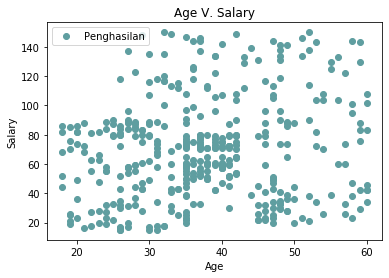

In [17]:
# define the x & y data.
x = salary['Age']
y = salary['EstimatedSalary']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'Penghasilan')

# make sure it's formatted.
plt.title("Age V. Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()

plt.show()

In [18]:
# let's measure that correlation
salary.corr()

,Age,EstimatedSalary
Age,1.000000,0.155238
EstimatedSalary,0.155238,1.000000


In [19]:
# let's take a look at a statistical summary.
salary.describe()

,Age,EstimatedSalary
count,400.000000,400.00000
mean,37.655000,69.74250
std,10.482877,34.09696
min,18.000000,15.00000
25%,29.750000,43.00000
50%,37.000000,70.00000
75%,46.000000,88.00000
max,60.000000,150.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000564A948>,
      dtype=object)

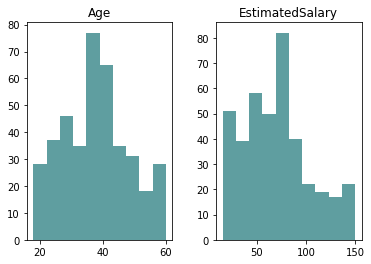

In [20]:
# Checking for outliers and skewness
salary.hist(grid = False, color = 'cadetblue')

In [21]:
# calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis.
age_kurtosis = kurtosis(salary['Age'])
salary_kurtosis = kurtosis(salary['EstimatedSalary'])

# calculate the skewness
age_skew = skew(salary['Age'])
salary_skew = skew(salary['EstimatedSalary'])

# Pearson correlation
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

display("Age Excess Kurtosis: {:.2}".format(age_kurtosis))
display("Salary Excess Kurtosis: {:.2}".format(salary_kurtosis))

display("Age Skew: {:.2}".format(age_skew))
display("Salary Skew: {:.2}".format(salary_skew))

Pearsons correlation: 0.155


'Age Excess Kurtosis: -0.63'

'Salary Excess Kurtosis: -0.42'

'Age Skew: 0.23'

'Salary Skew: 0.49'

In [22]:
# perform a kurtosis test
display('Age')
display(stats.kurtosistest(salary['Age']))
display('Salary')
display(stats.kurtosistest(salary['EstimatedSalary']))

# perform a skew test
display('Age')
display(stats.skewtest(salary['Age']))
display('Salary')
display(stats.skewtest(salary['EstimatedSalary']))

'Age'

KurtosistestResult(statistic=-3.6759479959987917, pvalue=0.00023696779553764472)

'Salary'

KurtosistestResult(statistic=-2.007244282145021, pvalue=0.04472365865691026)

'Age'

SkewtestResult(statistic=1.892277087752296, pvalue=0.058454072050636165)

'Salary'

SkewtestResult(statistic=3.893664081415509, pvalue=9.874136014273057e-05)

In [23]:
# define our input variable (X) & output variable.
Y = salary.drop('EstimatedSalary', axis = 1)
X = salary[['EstimatedSalary']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [24]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.055
The intercept for our model is 33.32


In [26]:
# let's test a prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 37.01


In [27]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[35.1267511 ],
       [36.659068  ],
       [39.77842739],
       [39.9973298 ],
       [39.77842739]])

In [28]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model.
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [29]:
# make some confidence intervals, 95% by default.
est.conf_int()

,0,1
const,32.003517,36.649302
EstimatedSalary,0.017798,0.077656


In [30]:
# estimate the p-values.
est.pvalues

const              2.147591e-100
EstimatedSalary     1.846057e-03
dtype: float64

In [31]:
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.18e+02
MAE 8.79
RMSE 10.8


In [32]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: -0.025


In [33]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.828
Date:                Sat, 09 May 2020   Prob (F-statistic):            0.00185
Time:                        15:39:32   Log-Likelihood:                -1502.1
No. Observations:                 400   AIC:                             3008.
Df Residuals:                     398   BIC:                             3016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              34.3264      1.182     

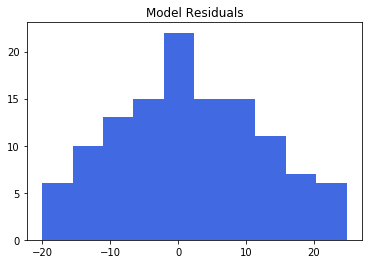

In [34]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

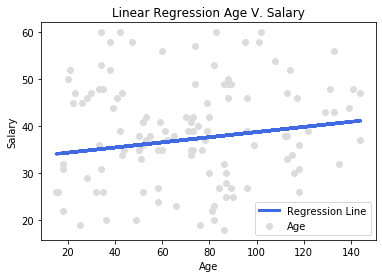

Salary Coefficient:0.055
Mean squared error: 117.6
Root Mean squared error: 10.84
R2 score: -0.025


In [35]:
# Plot outputs
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Age')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Age V. Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

# The coefficients
print('Salary Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))